<a href="https://colab.research.google.com/github/khanhne28/khanh/blob/main/NhanDangKhuonMat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m

In [2]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

def plot_reg_history(history_fine):
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

# 1.NHẬN DẠNG KHUÔN MẶT (ANN)

### 1.1 Load Data

In [3]:
# Load Data 
with open('data.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)

# Reshape Data
x_pre = x_train[95]
x_train = x_train[:210]
y_train = y_train[:210]
x_train = x_train.reshape(x_train.shape[0], -1)

# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train, 2)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

### 1.2 Create Model


Epoch 1/50
5/5 [==============================] - 1s 77ms/step - loss: 0.6888 - acc: 0.4903 - val_loss: 0.6662 - val_acc: 0.4615
Epoch 2/50
5/5 [==============================] - 0s 23ms/step - loss: 0.6299 - acc: 0.4903 - val_loss: 0.5582 - val_acc: 0.4615
Epoch 3/50
5/5 [==============================] - 0s 22ms/step - loss: 0.5147 - acc: 0.4903 - val_loss: 0.4591 - val_acc: 0.4615
Epoch 4/50
5/5 [==============================] - 0s 26ms/step - loss: 0.4216 - acc: 0.4903 - val_loss: 0.3950 - val_acc: 0.4615
Epoch 5/50
5/5 [==============================] - 0s 25ms/step - loss: 0.3654 - acc: 0.7613 - val_loss: 0.3666 - val_acc: 1.0000
Epoch 6/50
5/5 [==============================] - 0s 22ms/step - loss: 0.3465 - acc: 0.9613 - val_loss: 0.3549 - val_acc: 1.0000
Epoch 7/50
5/5 [==============================] - 0s 22ms/step - loss: 0.3288 - acc: 1.0000 - val_loss: 0.3330 - val_acc: 1.0000
Epoch 8/50
5/5 [==============================] - 0s 23ms/step - loss: 0.3055 - acc: 1.0000 - val

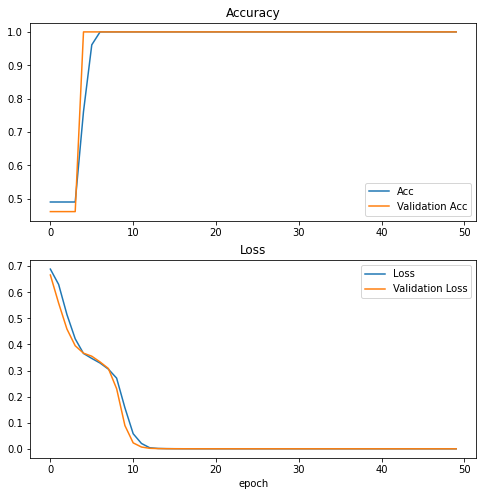

In [4]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape = (67500,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer =Adam(), metrics=['acc'])

history = model.fit(x_train, y_train, batch_size = 32, epochs = 50, validation_split = 0.2)

plot_history(history)

### 1.3 Predict

(150, 150, 3)


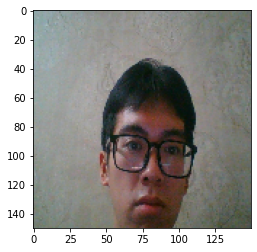

In [5]:
# Load Test Image
plt.imshow(cv2.cvtColor(x_pre, cv2.COLOR_BGR2RGB))
print(x_pre.shape)
img = x_pre.reshape(1,-1)
img = img.astype('float32')
img /= 255

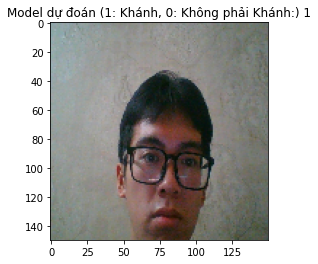

In [7]:
plt.title("Model dự đoán (1: Khánh, 0: Không phải Khánh:) " + str(np.argmax(model.predict(img))))
plt.imshow(cv2.cvtColor(x_pre, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

# 2. Nhận Dạng Khuôn Mặt (CNN)
### 2.1 Load Data

In [16]:
# Load Data 
with open('data2.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)

# Reshape Data
x_pre_1 = x_train[95]
x_pre_2 = x_train[195]

# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train, 4)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

### 2.2 Create Model

In [22]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (300,300,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 300, 300, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 300, 300, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 150, 150, 64)      18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                 

In [23]:
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
his = model.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_split = 0.2)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


5/5 [==============================] - 171s 34s/step - loss: 7.1663 - acc: 0.3556 - val_loss: 0.5799 - val_acc: 0.4810
Epoch 2/15
5/5 [==============================] - 165s 33s/step - loss: 0.8531 - acc: 0.4444 - val_loss: 0.4504 - val_acc: 0.7722
Epoch 3/15
5/5 [==============================] - 165s 33s/step - loss: 0.4463 - acc: 0.7143 - val_loss: 0.4747 - val_acc: 0.7468
Epoch 4/15
5/5 [==============================] - 168s 34s/step - loss: 0.4048 - acc: 0.7460 - val_loss: 0.3134 - val_acc: 0.7722
Epoch 5/15
5/5 [==============================] - 165s 33s/step - loss: 0.4014 - acc: 0.7016 - val_loss: 0.3466 - val_acc: 0.7975
Epoch 6/15
5/5 [==============================] - 165s 33s/step - loss: 0.3921 - acc: 0.7333 - val_loss: 0.3359 - val_acc: 0.7468
Epoch 7/15
5/5 [==============================] - 164s 33s/step - loss: 0.3707 - acc: 0.7556 - val_loss: 0.3197 - val_acc: 0.7848
Epoch 8/15
5/5 [==============================] - 168s 34s/step - loss: 0.3689 - acc: 0.7333 - val_lo

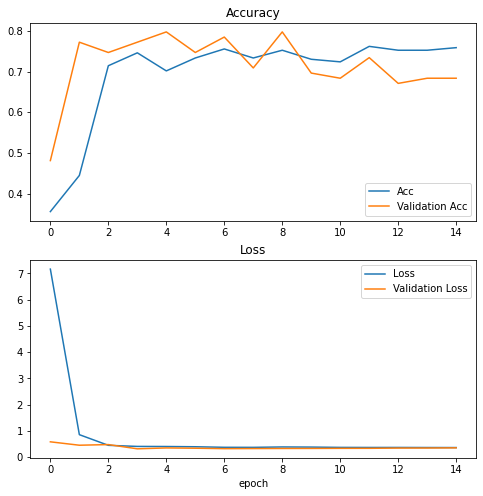

In [24]:
plot_history(his)

### 2.3 Predict

In [25]:
label = ['Khánh', 'Nam']

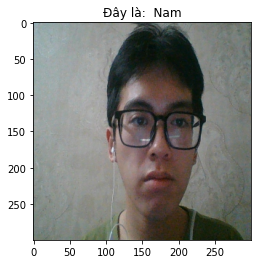

In [27]:
plt.title("Đây là:  " + label[np.argmax(model.predict(x_pre_1.reshape(1,300,300,3)))])
plt.imshow(cv2.cvtColor(x_pre_1, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

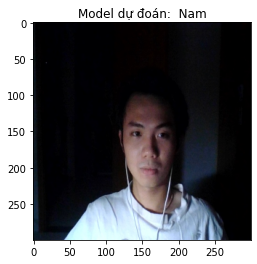

In [28]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_2.reshape(1,300,300,3)))])
plt.imshow(cv2.cvtColor(x_pre_2, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))